In [1]:
import pandas as pd
from itertools import combinations
from statistics import mean, pstdev, stdev
import matplotlib.pyplot as plt
import numpy as np

# Create the data of the companies

In [2]:
df = pd.read_excel('Worksheets for calculations.xlsx',sheet_name='Visualize CLT')
trunc_df = df.head(20)
df.head()

,Person names,Person age
0,P1,65
1,P2,6
2,P3,46
3,P4,23
4,P5,46


# Create combinations by taking n persons at a time

In [3]:
n_taken_at_a_time = 5
combination_of_companies = combinations(trunc_df['Person names'],n_taken_at_a_time)
combination_of_companies = list(combination_of_companies)
print('Total Combinations: {}'.format(len(combination_of_companies)))

Total Combinations: 15504


# Store the mean of samples

In [4]:
mean_ages_of_samples = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_ages_of_samples.append(mean(sample_ages))

# Distribution of population age

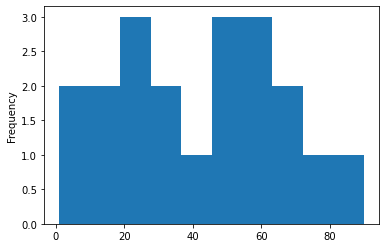

In [5]:
trunc_df['Person age'].plot.hist()

# Distributions of sample means

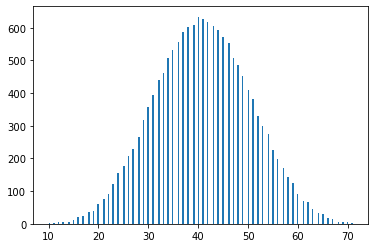

In [6]:
plt.hist(mean_ages_of_samples,bins=200)
plt.show()

# Population Mean and Standard deviation

In [7]:
pop_mean = mean(trunc_df['Person age'].values)
pop_sd = pstdev(trunc_df['Person age'].values)
print('Population mean = {}'.format(pop_mean))
print('Population sd = {}'.format(pop_sd))

Population mean = 41
Population sd = 24.06241883103193


# Mean and Standard deviation of sample means

In [8]:
print('Mean of sample means: {}'.format(mean(mean_ages_of_samples)))
print('Standard deviation of mean ages of samples {}'.format(pstdev(mean_ages_of_samples)))

Mean of sample means: 40
Standard deviation of mean ages of samples 9.539392014169456


# Relationship with population standard deviation

In [9]:
pstdev(mean_ages_of_samples)*n_taken_at_a_time**0.5

21.330729007701542

# Observations and Inferences
 - Mean of sample means = mean of population
 - Also note that none of the sample mean is equal to the population mean. So suppose out of the population we take a sample it is least likely that the given sample's mean = population mean.
 - Standard deviation of sample means is a scaled version of Population standard deviations by a factor of sqrt(number of samples)
 - The distribution of sample means follow a normal distribution and the population distribution doesn't really matter. It can follow any horrible distribution it may like.

# Why mean and standard deviation are good point estimates?
If I slowly increase the size of my sample, what should happen to the sample mean and standard deviations? They should get closer and closer to the population parameter.

## Convergence of sample mean towards the population mean

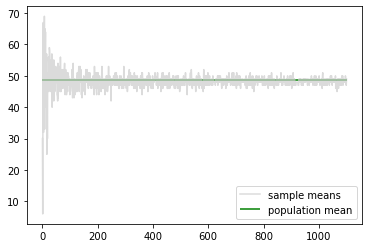

Population mean = 48.74272727272727


In [20]:
sample_means = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_means.append(mean(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_means, color='0.80', alpha=0.70)
# plot the population mean
plt.hlines(mean(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample means','population mean'], loc ="lower right")
plt.show()
print('Population mean = {}'.format(mean(df['Person age'])))

## Convergence of sample standard deviation towards population standard deviation

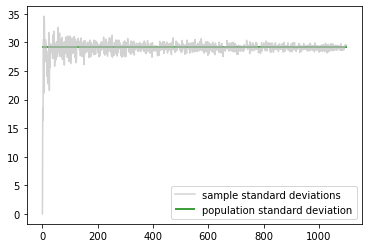

Population standard deviation = 29.1527044093711


In [27]:
sample_max = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_max.append(pstdev(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_max, color='0.75', alpha=0.70)
# plot the population mean
plt.hlines(pstdev(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample standard deviations','population standard deviation'], loc ="lower right")
plt.show()
print('Population standard deviation = {}'.format(pstdev(df['Person age'])))

## Will other sample statistics (e.g. sample max) converge towards the population mean?

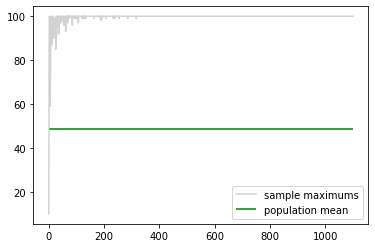

Population mean = 29.1527044093711


In [28]:
sample_max = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_max.append(max(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_max, color='0.75', alpha=0.70)
# plot the population mean
plt.hlines(mean(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample maximums','population mean'], loc ="lower right")
plt.show()
print('Population mean = {}'.format(pstdev(df['Person age'])))